In [1]:
# Import the necessary libraries or install them if they are not installed related to training the model.
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics 
from sklearn.preprocessing import LabelEncoder, StandardScaler

C:\Users\Firesoft\AppData\Local\Temp\ipykernel_7480\1234140612.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Read the data from the csv file
col_names = ["id", "age", "sex", "region", "income", "married", "children", "car", "save_act", "current_act", "mortgage", "pep"]
bank = pd.read_csv("bank.csv", header=None, names=col_names, skiprows=[0])

In [3]:
bank.head()

,id,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
0,ID12101,48,FEMALE,INNER_CITY,17546.0,NO,1,NO,NO,NO,NO,YES
1,ID12102,40,MALE,TOWN,30085.1,YES,3,YES,NO,YES,YES,NO
2,ID12103,51,FEMALE,INNER_CITY,16575.4,YES,0,YES,YES,YES,NO,NO
3,ID12104,23,FEMALE,TOWN,20375.4,YES,3,NO,NO,YES,NO,NO
4,ID12105,57,FEMALE,RURAL,50576.3,YES,0,NO,YES,NO,NO,NO


In [4]:
# Convert the categorical data into numerical data
catergorical_columns = ["sex", "married", "car", "save_act", "current_act", "mortgage", "pep"]
bank = pd.get_dummies(bank, columns=catergorical_columns, drop_first=True, prefix=None)
# Convert the non-binary categorical data into numerical data
label_encoder = LabelEncoder()
bank["region"] = label_encoder.fit_transform(bank["region"])

In [5]:
bank.head()

,id,age,region,income,children,sex_MALE,married_YES,car_YES,save_act_YES,current_act_YES,mortgage_YES,pep_YES
0,ID12101,48,0,17546.0,1,False,False,False,False,False,False,True
1,ID12102,40,3,30085.1,3,True,True,True,False,True,True,False
2,ID12103,51,0,16575.4,0,False,True,True,True,True,False,False
3,ID12104,23,3,20375.4,3,False,True,False,False,True,False,False
4,ID12105,57,1,50576.3,0,False,True,False,True,False,False,False


In [6]:
# Spilitting the data, the features columns refers to the independent variables and the label column refers to the dependent variable
# The label column is the column that we are trying to predict
feature_cols = ["age", "sex_MALE", "income", "married_YES", "children", "car_YES", "save_act_YES", "current_act_YES", "mortgage_YES"]
X = bank[feature_cols] # Features
y = bank.pep_YES # Target variable

In [7]:
# Splitting the data into training and testing sets
# 70% training and 30% testing are the common ratios (80/20 is also common)
# The random_state is used to ensure that the data is split in the same way every time the code is run

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [8]:
# Normalize the data to make the model more accurate as this is a KNN model.
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
# To find the best value for k, we can use the cross-validation method
# which is a technique used to evaluate the model's performance according to the different values of k
k_values = [i for i in range (1,31)]
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(X)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))

Text(0, 0.5, 'Accuracy Score')

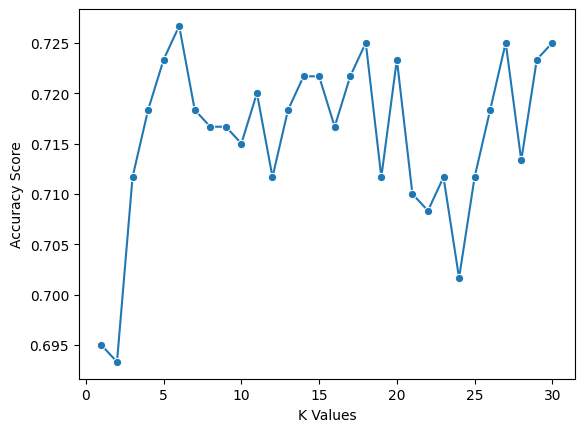

In [10]:
# Visualizing the best value for k
import seaborn as sns
from matplotlib import pyplot as plt
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [11]:
# Create KNN classifer object
knn = KNeighborsClassifier(n_neighbors=np.argmax(scores))

# Fit the data into the model
knn = knn.fit(X_train,y_train)

# Predict the response for test dataset
y_pred = knn.predict(X_test)

In [12]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Model Precision, how consistent is the classifier?
print("Precision:",metrics.precision_score(y_test, y_pred))

Accuracy: 0.7055555555555556
Precision: 0.6753246753246753


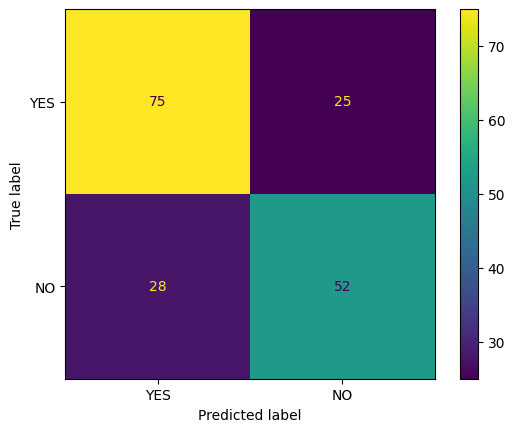

In [13]:
# Create the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
visualized_cm = ConfusionMatrixDisplay(cm, display_labels=["YES", "NO"]).plot()
# Note: The top left are the True Positives,
# The top right are the False Positives,
# The bottom left are the False Negatives,
# The bottom right are the True Negatives.

# Notes
### KNN Pros
- KNN is a non-parametric algorithm, meaning it doesn't make any assumptions about the underlying data distribution. This makes it versatile and applicable to a wide range of problems, including those where the data distribution is unknown or complex. (Source chatGPT)
- KNN is easy to understand and implement. It's a straightforward algorithm that doesn't require complex assumptions or training process, making it a good choice for beginners.
### KNN Cons
- KNN can be computationally expensive, especially as the size of the training dataset grows. Since it requires computing the distance between the query instance and all training instances, the algorithm's complexity can become prohibitive for large datasets. (Source chatGPT)
- Sensitive to Noise and Irrelevant Features: KNN is sensitive to noisy data and irrelevant features. Outliers or irrelevant attributes in the dataset can significantly impact the algorithm's performance, as they can affect the distance calculation and hence the classification results. (Source chatGPT)

### What I have learned
- KNN gets the second place in terms of both accuracy and precision score. It was expected for KNN to perform reasonably well but it was far from decision trees.
- According to this dataset, both decision trees and all algorithms like KNN are sensitive to noisy data but KNN was the second most resilient out of them all.
- If the data was not normalized, the performance was comparable to the worst performing of them all. (You are required to normalize the data anyway).